<a href="https://colab.research.google.com/github/das2002/Remote-Sensing-Beaverworks/blob/master/strohs_initial_setup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# System setup for BWSI Remote Sensing for HADR course
This notebook will run through the initial setup of the development environment. It installs necessary packages, and configures the relevant settings. To run code, first click on a cell to highlight it, then use Ctrl+Enter, or click on the play button on the left to run the code within it. To run the code and advance to the next cell, press Shift+Enter.

## Update system package manager and install dependencies

---
The colab notebooks run the code on a remote virtual machine on Google cloud. The first time you use colab, only the default packages and programs are installed, so we need to do some installations to get up and running.

### Running system commands

Typically, colab (jupyter) notebooks interact only the with the `python` kernel; that is, all of the code written into the cells are python commands, and are executed by the `python` interpreter program when the cell is run.

However, we need to install system-level packages, which need to be run outside of `python`.  Fortunately, you are able to run command-line (the command line, or terminal, is a text-based interface to a computer) commands from jupyter/colab notebooks using the special `!` leading character. For example `!ls` runs the program `ls`, which _lists_ the contents of the current folder.



In [0]:
!ls

sample_data


Additionally, the vm that hosts colab is _ephermeral_ which means that each time you disconnect, all your files and variables are deleted. In order to persist files, you can _mount_ (attach) your google drive folder, which will be accessible in the filesystem at `/content/drive/'My Drive'`

This way, if you save a file to that directory, then it will persist between sessions.

In [0]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls /content/drive/'My Drive'/*.ipynb

'/content/drive/My Drive/02_Visualization_and_Shapes.ipynb'
'/content/drive/My Drive/Untitled0.ipynb'
'/content/drive/My Drive/Untitled1.ipynb'


### Installing system packages with `apt`
We will use this to run some terminal commands to install necessary packages using `apt`.

`apt` is the built-in system package manager (kind of like a command-line app store). This allows us to install system programs from the command line into the virtual machine. In this first cell, we run the follow commands:

`!apt update` (updates `apt` so that it knows about the latest versions of all packages)
`!apt upgrade` (upgrades existing packages which have newer versions)
`!apt install gdal-bin python-gdal python3-gdal` (installs three packages: `gdal-bin`, `python-gdal`, `python3-gdal`)

The program [GDAL](https://gdal.org/) is an open source library of tools which can be used to process geospatial data. The packages we installed via `apt` are: 
- `gdal-bin` the main gdal program
- `python-gdal` tools for integrating gdal with python
- `python3-gdal` tools for integrating gdal with python3


In [0]:
try:
  import gdal
except:
  !apt update
  !apt upgrade
  !apt install gdal-bin python-gdal python3-gdal
  import gdal

## Installing python packages
The Colab environment already has many common python packages pre-installed. However, we need to install a couple more packages. We'll use `pip`, the python package installer. Again, we use the `!` notation to make a command-line call.

We will install the following additional packages:
- geopandas: a package for working with geo-spatial information (GIS)

In [0]:
!apt install gdal-bin python-gdal python3-gdal
!pip install geopandas

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
     |████████████████████████████████| 901kB 4.9MB/s 
     |████████████████████████████████| 11.2MB 42.7MB/s 
     |████████████████████████████████| 17.9MB 31.1MB/s 
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch


Let's test if everything worked.

`cat` is a unix program (short for con _cat_ enate) which concatenates two files together. It can also be used to print the contents out to command line

In [0]:
import gdal
import numpy as np 
from matplotlib import pyplot as plt
import cv2

In [0]:
cv2.__version__

'3.4.3'

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [0]:
cd /gdrive/'My Drive'/BWSI-Remote-Sensing/satellite_tiffs

/gdrive/My Drive/BWSI-Remote-Sensing/satellite_tiffs


In [0]:
gdal.Translate('band1.jpg', 'p040r30_5t19880821_nn1.tif', options = '-of JPEG')

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f9ee4655cc0> >

In [0]:
cd 'My Drive'

[Errno 2] No such file or directory: 'My Drive'
/gdrive/My Drive/BWSI-Remote-Sensing/satellite_tiffs


In [0]:
ls

band1.jpg          band3.jpg          p040r30_5t19880821_nn1.tif  rgbImag.jpg
band1.jpg.aux.xml  band3.jpg.aux.xml  p040r30_5t19880821_nn2.tif  rgb_img.jpg
band2.jpg          band4.jpg          p040r30_5t19880821_nn3.tif
band2.jpg.aux.xml  band4.jpg.aux.xml  p040r30_5t19880821_nn4.tif


In [0]:
gdal.Translate('band2.jpg', 'p040r30_5t19880821_nn2.tif', options = '-of JPEG')

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f9ee46557e0> >

In [0]:
gdal.Translate('band3.jpg', 'p040r30_5t19880821_nn3.tif', options = '-of JPEG')

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f9ee4655450> >

In [0]:
gdal.Translate('band4.jpg', 'p040r30_5t19880821_nn4.tif', options = '-of JPEG')

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f9ee46556c0> >

In [0]:
import numpy as np

In [0]:
from google.colab.patches import cv2_imshow

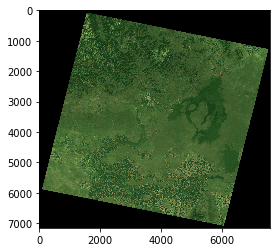

In [0]:
img = cv2.imread("band3.jpg")
blue = img[:,:,0].copy()
img = cv2.imread("band1.jpg")
green = img[:,:,0].copy()
img = cv2.imread("band2.jpg")
red = img[:,:,0].copy()
img = cv2.merge((blue,green,red))
#cv2_imshow(get_channel(im, 0))
plt.imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [0]:
cv2.imwrite("rgbImag.jpg", img)

True

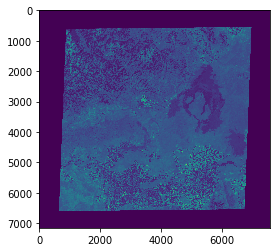

In [0]:
img = cv2.imread("band3.jpg", 0)
rows, cols = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),12,1)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(dst)

In [0]:
img = cv2.imread("rgmImag.jpg")

TypeError: ignored

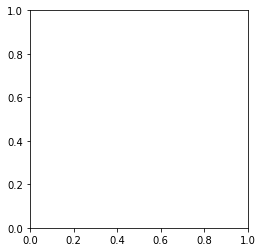

In [0]:
plt.imshow(img)

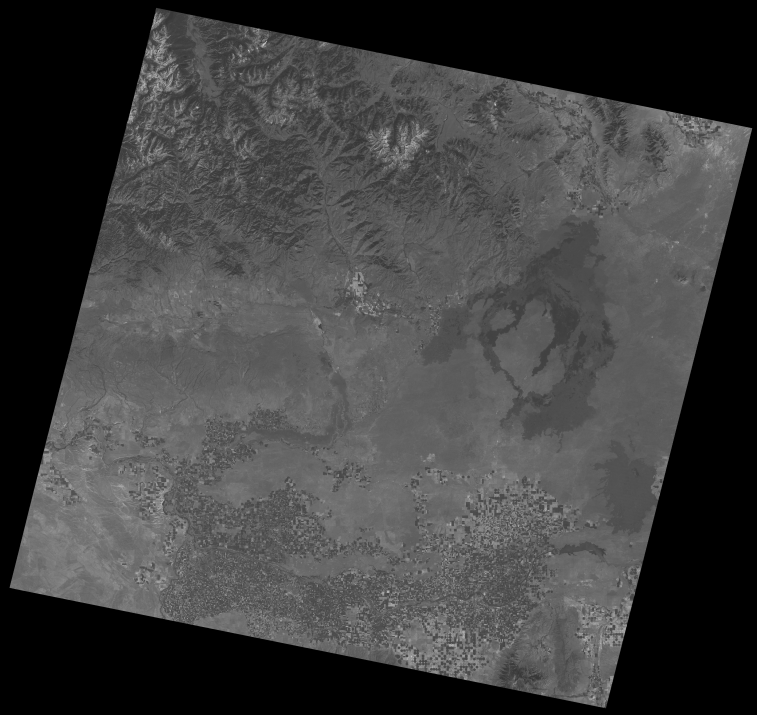

In [0]:
img = cv2.imread('band1.jpg', cv2.IMREAD_UNCHANGED)
scale_percent = 10.0
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
cv2_imshow(resized)

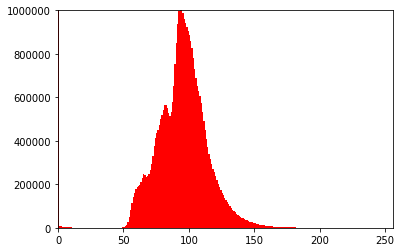

In [0]:
hist,bins = np.histogram(img.flatten(),256,[0,256])

#cdf = hist.cumsum()
#cdf_normalized = cdf * hist.max()/ cdf.max()

#plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.ylim([1,1e6])
#plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

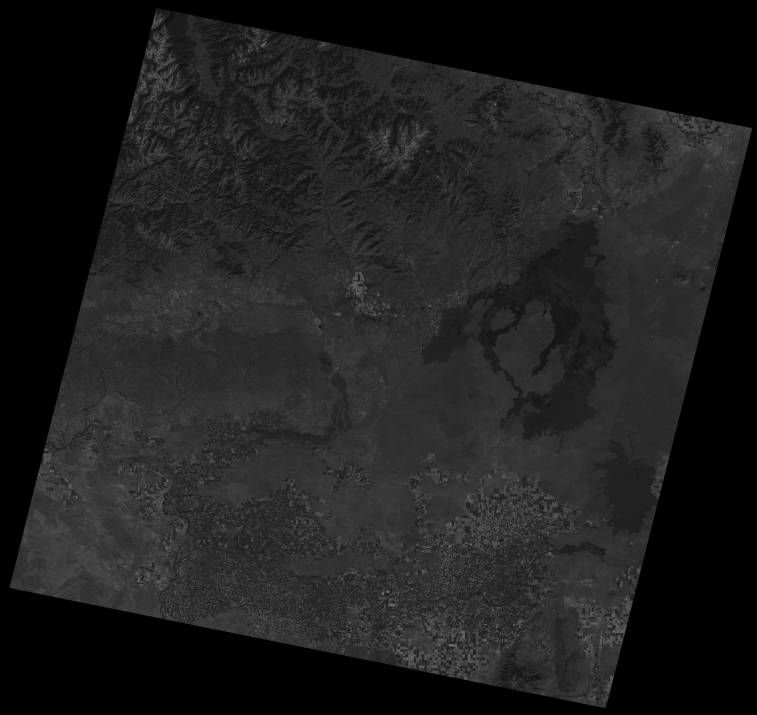

In [0]:
img = cv2.imread('band2.jpg', cv2.IMREAD_UNCHANGED)
scale_percent = 10.0
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
cv2_imshow(resized)

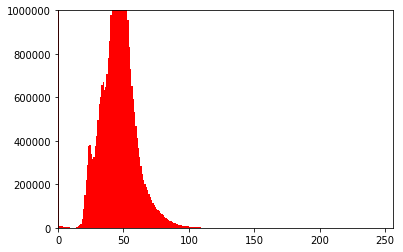

In [0]:
hist,bins = np.histogram(img.flatten(),256,[0,256])

#cdf = hist.cumsum()
#cdf_normalized = cdf * hist.max()/ cdf.max()

#plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.ylim([1,1e6])
#plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

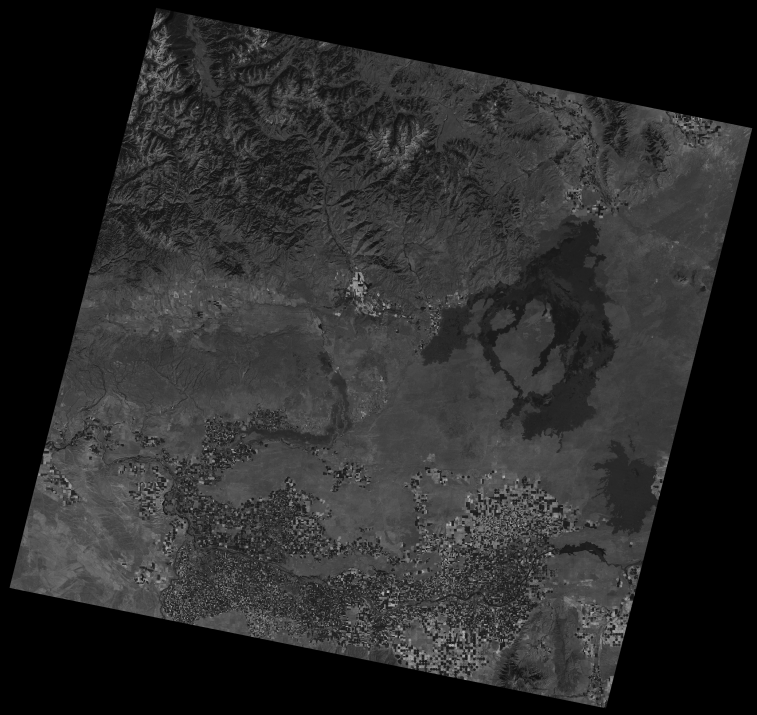

In [0]:
img = cv2.imread('band3.jpg', cv2.IMREAD_UNCHANGED)
scale_percent = 10.0
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
cv2_imshow(resized)

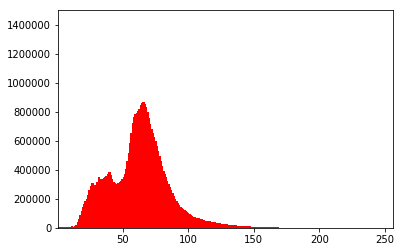

In [0]:
hist,bins = np.histogram(img.flatten(),256,[0,256])

#cdf = hist.cumsum()
#cdf_normalized = cdf * hist.max()/ cdf.max()

#plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([1,256])
plt.ylim([0, 1.5e6])
#plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [0]:
b = cv2.imread('band1.jpg', 0)
g = cv2.imread('band2.jpg', 0)
r = cv2.imread('band3.jpg', 0)

"""Create a blank image that has three channels 
and the same number of pixels as your original input"""
rgb_img = np.zeros((b.shape[0], b.shape[1], 3))

"""Add the channels to the needed image one by one"""
rgb_img[:,:,0] = b
rgb_img[:,:,1] = g
rgb_img[:,:,2] = r

"""Save the needed multi channel image"""
cv2.imwrite('rgb_img.jpg',rgb_img)

True

In [0]:
img = cv2.imread('rgb_img.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [0]:
cv2.destroyAllWindows()

In [0]:
cv2_imshow(rgb_img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()